# MARKET MIX MODELLING

# XYZ Company is currently grappling with challenges in effectively allocating its advertising revenue and is actively seeking a viable solution to address this issue.

#  Data Exploration:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("marketing_spend_and_revenue_data.xlsx")
df.head(10)

,Date,Revenue,Google Performance Max,Google Search Brand,Google Search No Brand,Facebook Conversions,Facebook Others,Facebook Product Catalog Sales,Influencers,Display Ads,TV Ads,Radio Ads,Magazine Ads
0,2022-01-01,5796.714153,565.844985,322.220135,1362.108867,163.379921,152.275251,585.579521,486.459433,1326.028990,1702.230023,166.876823,599.465584
1,2022-01-02,5165.863043,458.498491,232.034662,1217.779342,240.671009,572.280788,367.558630,181.465092,761.528524,1082.458280,127.253406,319.817106
2,2022-01-03,6965.648769,673.987247,351.658849,1723.328306,777.660821,646.790367,443.272047,413.778807,421.681361,630.103186,192.637981,282.768262
3,2022-01-04,5710.922590,600.195659,253.768142,688.169972,580.639485,545.659219,375.149632,190.269984,244.705077,2318.640804,166.475016,412.040813
4,2022-01-05,4371.813951,456.867519,255.514027,835.129990,332.607431,449.809561,363.454579,294.213237,552.753741,2157.475018,127.684970,184.554535
5,2022-01-06,5498.896304,608.101910,319.332238,1594.655139,555.143782,166.640187,511.458291,198.904111,666.005447,731.738119,187.616823,138.135010
6,2022-01-07,4793.665026,359.745840,280.309542,1141.915796,651.128667,207.634821,491.992404,272.208018,1127.218223,2021.570097,141.649647,413.639698
7,2022-01-08,7003.532898,660.489451,347.133441,915.574385,641.108240,557.713622,446.782595,152.959174,1379.836416,998.584458,241.380735,146.187946
8,2022-01-09,5291.506397,478.974935,310.345426,1644.136950,356.702259,903.303099,449.620601,99.523366,901.144914,2114.880310,142.852386,236.761098
9,2022-01-10,6713.267433,798.700105,321.065738,1714.364556,360.081906,299.897029,324.647311,283.455780,355.824978,1175.230343,211.763561,521.811375


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            365 non-null    datetime64[ns]
 1   Revenue                         365 non-null    float64       
 2   Google Performance Max          365 non-null    float64       
 3   Google Search Brand             365 non-null    float64       
 4   Google Search No Brand          365 non-null    float64       
 5   Facebook Conversions            365 non-null    float64       
 6   Facebook Others                 365 non-null    float64       
 7   Facebook Product Catalog Sales  365 non-null    float64       
 8   Influencers                     365 non-null    float64       
 9   Display Ads                     365 non-null    float64       
 10  TV Ads                          365 non-null    float64       
 11  Radio 

In [4]:
df.isnull().sum()

Date                              0
Revenue                           0
Google Performance Max            0
Google Search Brand               0
Google Search No Brand            0
Facebook Conversions              0
Facebook Others                   0
Facebook Product Catalog Sales    0
Influencers                       0
Display Ads                       0
TV Ads                            0
Radio Ads                         0
Magazine Ads                      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Date,Revenue,Google Performance Max,Google Search Brand,Google Search No Brand,Facebook Conversions,Facebook Others,Facebook Product Catalog Sales,Influencers,Display Ads,TV Ads,Radio Ads,Magazine Ads
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,7900.774957,789.936482,392.411062,1078.169406,478.057189,550.112605,629.836776,275.546613,846.135791,1448.513381,238.025345,397.785930
min,2022-01-01 00:00:00,4095.786143,240.651050,158.528897,307.844420,150.019967,105.182794,264.070436,50.102167,206.021630,502.947644,84.875264,103.628226
25%,2022-04-02 00:00:00,6974.247316,671.008486,336.183785,737.041609,318.786045,341.917854,531.905607,164.601780,508.806322,955.499472,207.927612,252.634949
50%,2022-07-02 00:00:00,7915.844902,796.462406,396.050638,1067.670685,491.356199,545.659219,637.274431,273.633567,861.562291,1428.190319,237.792313,394.956728
75%,2022-10-01 00:00:00,8870.198709,913.110964,449.222336,1462.851808,640.452868,756.557406,714.792181,390.777340,1187.217741,1929.437667,275.749502,547.440270
max,2022-12-31 00:00:00,11667.224112,1319.046273,655.498198,1799.576510,797.852955,997.514110,1075.921842,499.736177,1498.560396,2496.695023,377.284762,699.734622
std,NaN,1430.141416,172.276270,85.953756,436.142312,183.960184,261.569706,143.046853,132.043304,383.768572,574.515785,52.202092,172.150649


# Exploratory Data Analysis (EDA)

# Outliers

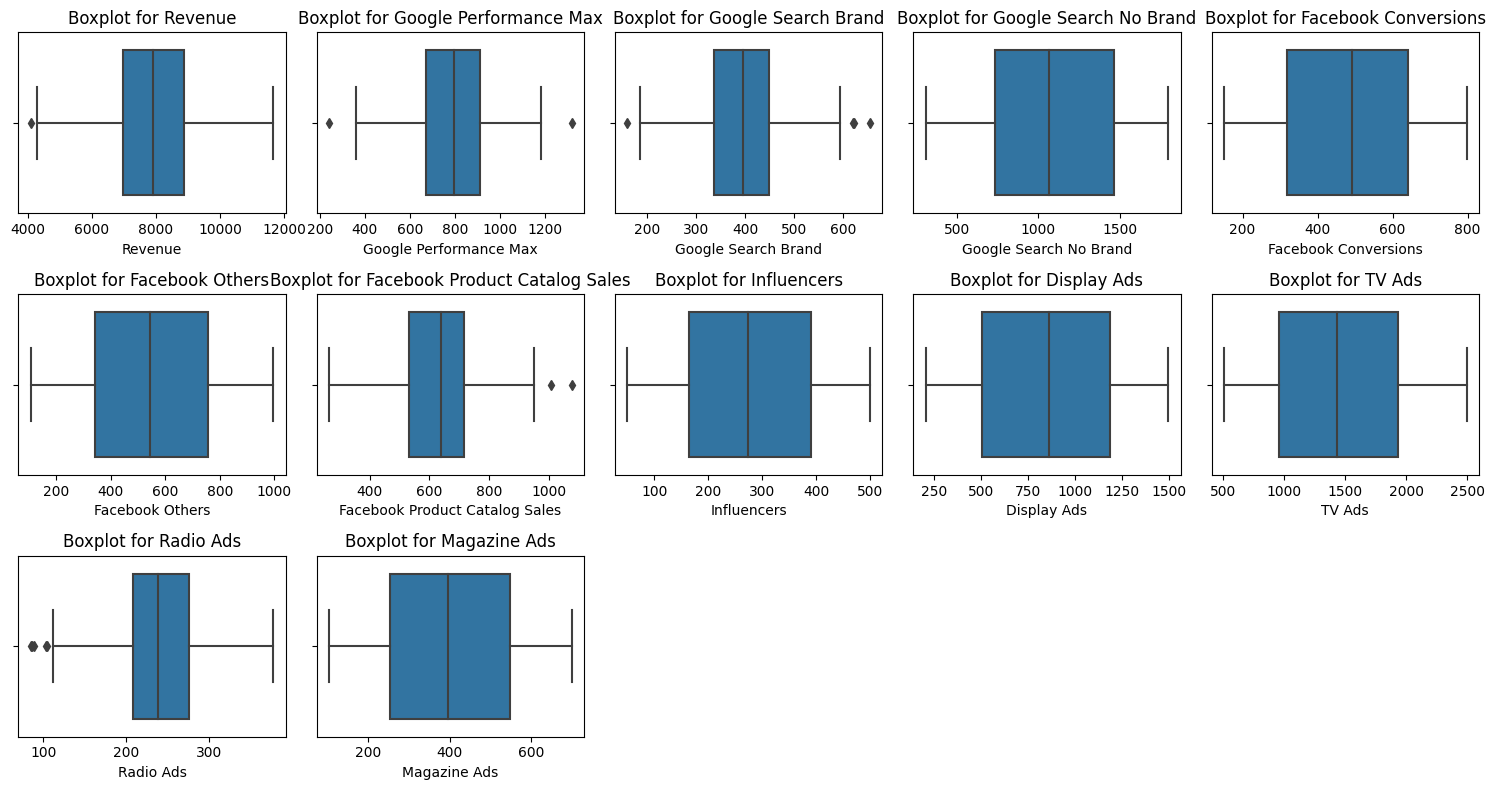

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


Original DataFrame shape: (365, 13)
DataFrame shape after removing outliers: (313, 13)


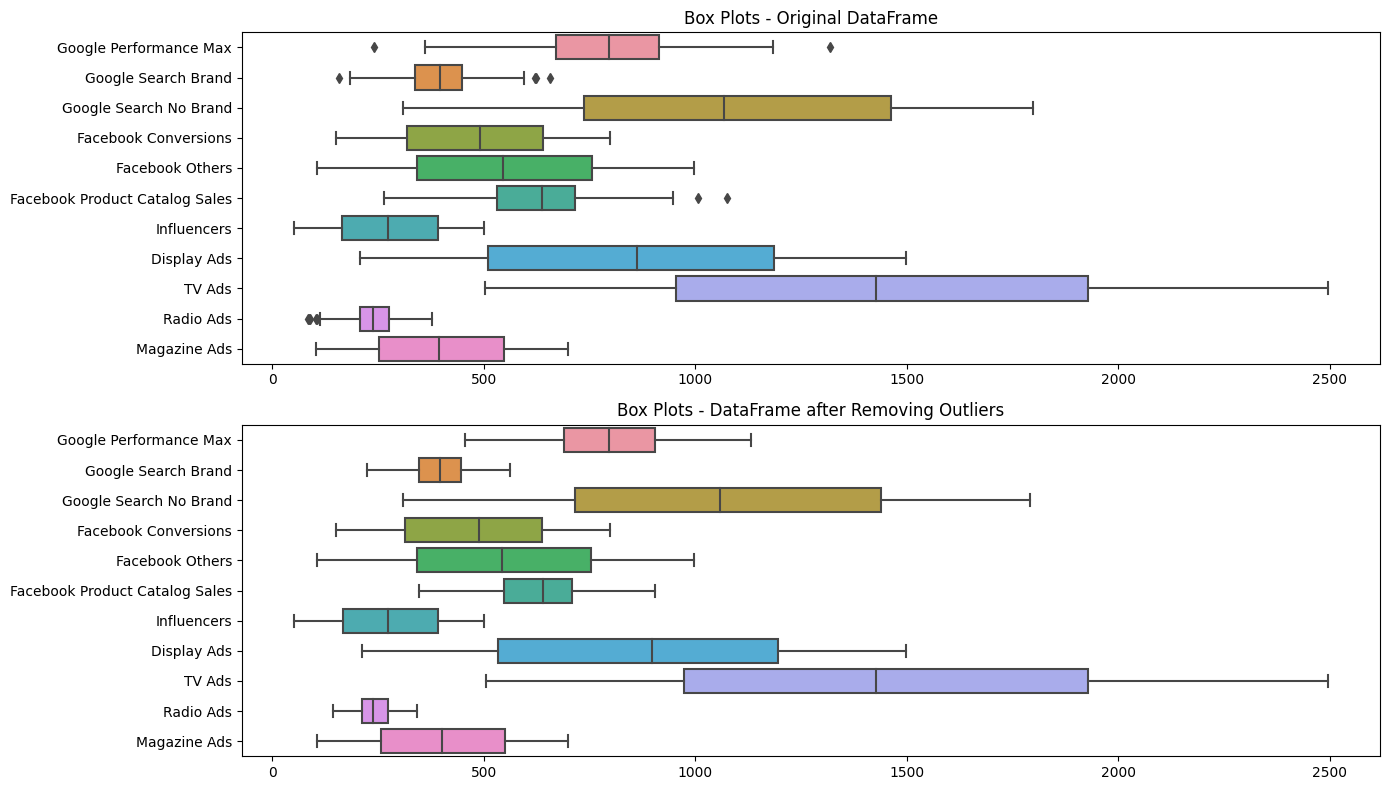

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for modeling
feature_columns = [
    'Google Performance Max',            
    'Google Search Brand',               
    'Google Search No Brand',            
    'Facebook Conversions',              
    'Facebook Others',                   
    'Facebook Product Catalog Sales',    
    'Influencers',                       
    'Display Ads',                      
    'TV Ads',                            
    'Radio Ads',                         
    'Magazine Ads'                      
]

# Calculate z-scores for each data point
z_scores = stats.zscore(df[feature_columns])

# Set a z-score threshold for outlier detection 
z_threshold = 2

# Identify and remove outliers
outlier_indices = (np.abs(z_scores) > z_threshold).any(axis=1)
df_no_outliers = df[~outlier_indices]

# Check the shape before and after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

# Create box plots for each feature before and after removing outliers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.boxplot(data=df[feature_columns], orient='h')
plt.title('Box Plots - Original DataFrame')

plt.subplot(2, 1, 2)
sns.boxplot(data=df_no_outliers[feature_columns], orient='h')
plt.title('Box Plots - DataFrame after Removing Outliers')

plt.tight_layout()
plt.show()

# Replace the original DataFrame with the one without outliers
df = df_no_outliers.copy()


# Creating a correlation matrix

In [9]:
import pandas as pd

# Selecting relevant columns for correlation analysis
columns_for_correlation = [
    'Revenue',
    'Google Performance Max',
    'Google Search Brand',
    'Google Search No Brand',
    'Facebook Conversions',
    'Facebook Others',
    'Facebook Product Catalog Sales',
    'Influencers',
    'Display Ads',
    'TV Ads',
    'Radio Ads',
    'Magazine Ads']

# Creating a correlation matrix
correlation_matrix = df[columns_for_correlation].corr()


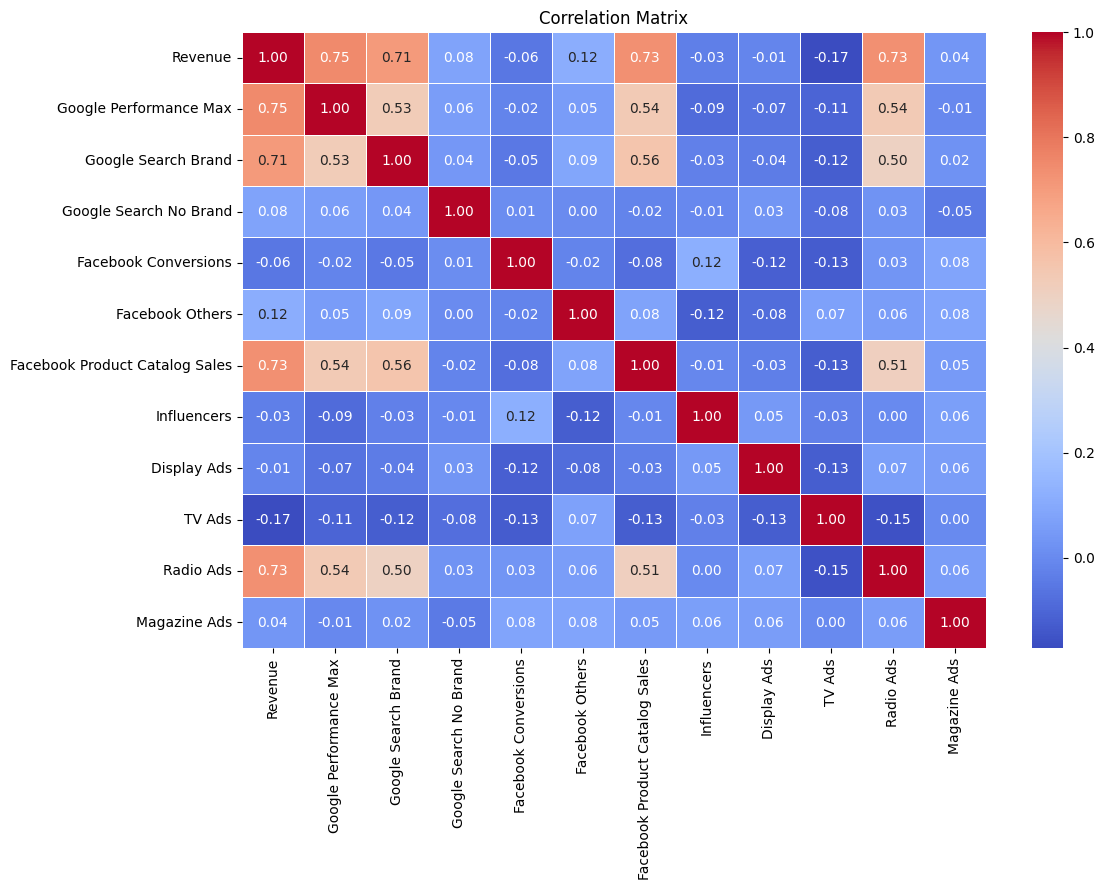

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Variance inflation Factor

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Selecting relevant columns for VIF calculation
columns_for_vif = [
    'Google Performance Max',
    'Google Search Brand',
    'Google Search No Brand',
    'Facebook Conversions',
    'Facebook Others',
    'Facebook Product Catalog Sales',
    'Influencers',
    'Display Ads',
    'TV Ads',
    'Radio Ads',
    'Magazine Ads']

# Creating a DataFrame with the selected columns
df_for_vif = df[columns_for_vif]

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]

# Displaying the VIF values
print(vif_data)


                          Variable        VIF
0           Google Performance Max  52.478894
1              Google Search Brand  55.628129
2           Google Search No Brand   6.653583
3             Facebook Conversions   7.249229
4                  Facebook Others   5.531177
5   Facebook Product Catalog Sales  53.160655
6                      Influencers   5.478175
7                      Display Ads   5.797579
8                           TV Ads   6.412932
9                        Radio Ads  54.965156
10                    Magazine Ads   6.528563


# PCA

Feature Importances:
Google Search Brand               0.390309
Radio Ads                         0.193678
Google Performance Max            0.178018
Facebook Product Catalog Sales    0.134208
Magazine Ads                      0.021543
Google Search No Brand            0.016585
TV Ads                            0.014707
Facebook Conversions              0.014478
Facebook Others                   0.012717
Display Ads                       0.012484
Influencers                       0.011273
dtype: float64


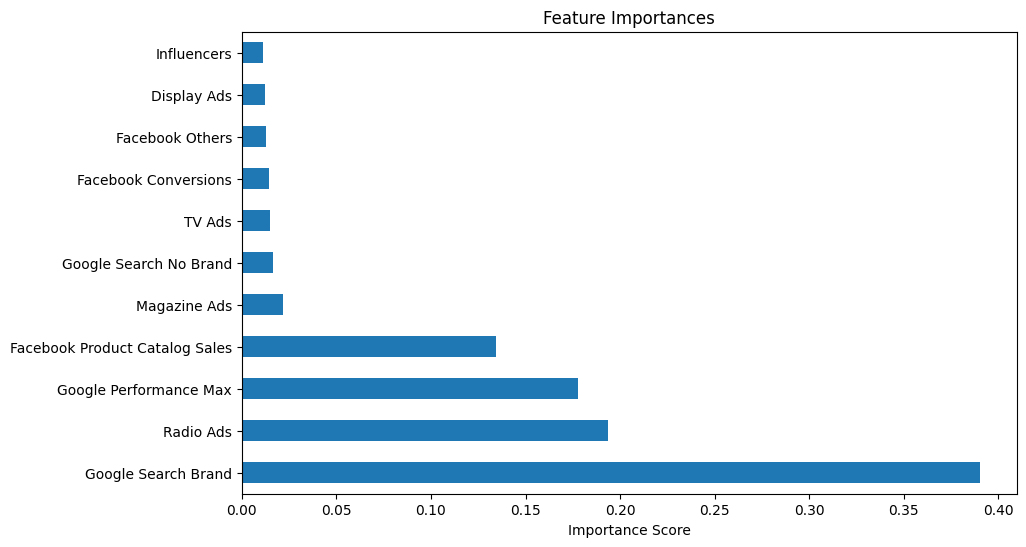

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Selecting relevant columns for modeling
columns_for_modeling = [
    'Google Performance Max',
    'Google Search Brand',
    'Google Search No Brand',
    'Facebook Conversions',
    'Facebook Others',
    'Facebook Product Catalog Sales',
    'Influencers',
    'Display Ads',
    'TV Ads',
    'Radio Ads',
    'Magazine Ads']

# Features and target variable
X = df[columns_for_modeling]
y = df['Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=columns_for_modeling).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()


# Budget Allocation:

Google Performance Max            0.099799
Google Search Brand               0.049697
Google Search No Brand            0.134231
Facebook Conversions              0.059565
Facebook Others                   0.069116
Facebook Product Catalog Sales    0.079456
Influencers                       0.034769
Display Ads                       0.108277
TV Ads                            0.181992
Radio Ads                         0.030226
Magazine Ads                      0.050518
dtype: float64


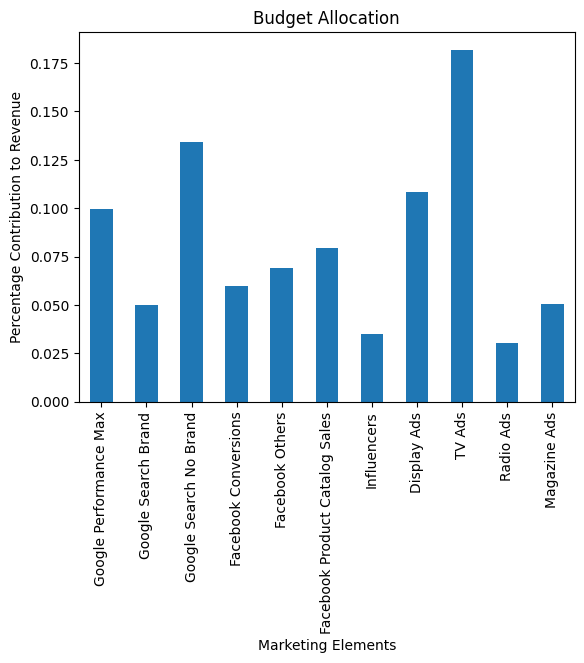

In [13]:
# Assuming 'marketing_elements' is a list of marketing columns
marketing_elements = [    
    'Google Performance Max',
    'Google Search Brand',
    'Google Search No Brand',
    'Facebook Conversions',
    'Facebook Others',
    'Facebook Product Catalog Sales',
    'Influencers',
    'Display Ads',
    'TV Ads',
    'Radio Ads',
    'Magazine Ads']

# Calculate percentage contribution to sales for each marketing element
total_revenue = df['Revenue'].sum()
element_revenue_contributions = df[marketing_elements].sum() / total_revenue  

# Display percentage contributions
print(element_revenue_contributions)

# Visualization of percentage contribution to sales for each marketing element
element_revenue_contributions.plot(kind='bar')
plt.xlabel('Marketing Elements')
plt.ylabel('Percentage Contribution to Revenue')
plt.title('Budget Allocation')
plt.show()


# ROI Analysis

In [14]:
# Calculate the sum of the 'Revenue' column for each month
total_revenue = df['Revenue'].sum()
print(total_revenue)

2489206.3804711867


In [15]:
import pandas as pd

# Assuming df is your DataFrame with the provided data

# Define columns for Net Profit and Cost of the investment
revenue_column = 'Revenue'
cost_columns = [
    'Google Performance Max',
    'Google Search Brand',
    'Google Search No Brand',
    'Facebook Conversions',
    'Facebook Others',
    'Facebook Product Catalog Sales',
    'Influencers',
    'Display Ads',
    'TV Ads',
    'Radio Ads',
    'Magazine Ads',
    ]

# Select relevant columns
revenue = df[revenue_column]
costs = df[cost_columns]

# Fill missing values with mean for costs
costs_cleaned = costs.fillna(costs.mean())

# Initialize a dictionary to store average ROI for each cost column
avg_roi_per_column = {}

# Iterate over each cost column
for cost_column in cost_columns:
    # Calculate Net Profit and Cost of the investment
    net_profit = revenue - costs_cleaned[cost_column]
    investment_cost = costs_cleaned[cost_column]
    
    # Calculate ROI, handling division by zero
    roi = (net_profit / investment_cost) * 100
    roi_cleaned = roi.replace([np.inf, -np.inf], np.nan).fillna(0) 
    
    # Calculate and store average ROI for the current cost column
    avg_roi = roi_cleaned.mean()
    avg_roi_per_column[cost_column] = avg_roi

# Sort the dictionary by average ROI in descending order
sorted_avg_roi = dict(sorted(avg_roi_per_column.items(), key=lambda item: item[1], reverse=True))

# Print the sorted average ROI for each cost column
print("Average ROI for Each Cost Column (Sorted):")
for column, avg_roi in sorted_avg_roi.items():
    print(f"{column}: {avg_roi:.2f}%")


Average ROI for Each Cost Column (Sorted):
Influencers: 3950.56%
Radio Ads: 3254.57%
Magazine Ads: 2463.01%
Facebook Conversions: 1953.38%
Google Search Brand: 1941.26%
Facebook Others: 1924.58%
Facebook Product Catalog Sales: 1178.97%
Display Ads: 1134.24%
Google Performance Max: 917.89%
Google Search No Brand: 832.02%
TV Ads: 568.70%


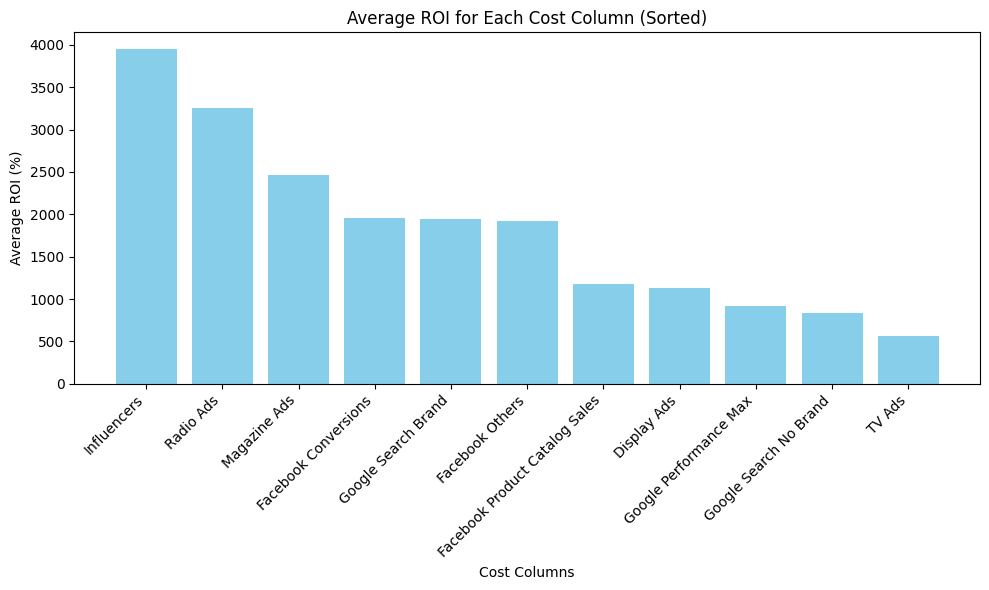

In [16]:
import matplotlib.pyplot as plt

# Convert the dictionary to a DataFrame for easier plotting
avg_roi_df = pd.DataFrame(list(sorted_avg_roi.items()), columns=['Cost Column', 'Average ROI'])

# Plotting average ROI for each cost column
plt.figure(figsize=(10, 6))
plt.bar(avg_roi_df['Cost Column'], avg_roi_df['Average ROI'], color='skyblue')
plt.xlabel('Cost Columns')
plt.ylabel('Average ROI (%)')
plt.title('Average ROI for Each Cost Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Increase revenue by 10%


Column: Influencers
Original Sum: 86548.23765970182
Modified Sum (10% Increase): 95203.06142567201
Increase Percentage: 10.00%


Column: Radio Ads
Original Sum: 75238.08639962827
Modified Sum (10% Increase): 82761.89503959111
Increase Percentage: 10.00%


Column: Magazine Ads
Original Sum: 125749.748256703
Modified Sum (10% Increase): 138324.72308237333
Increase Percentage: 10.00%


Column: Google Search Brand
Original Sum: 123706.68480334638
Modified Sum (10% Increase): 136077.35328368103
Increase Percentage: 10.00%


Column: Facebook Conversions
Original Sum: 148269.87276636122
Modified Sum (10% Increase): 163096.86004299737
Increase Percentage: 10.00%


Column: Facebook Others
Original Sum: 172044.5664268838
Modified Sum (10% Increase): 189249.02306957223
Increase Percentage: 10.00%



<Figure size 1200x800 with 0 Axes>

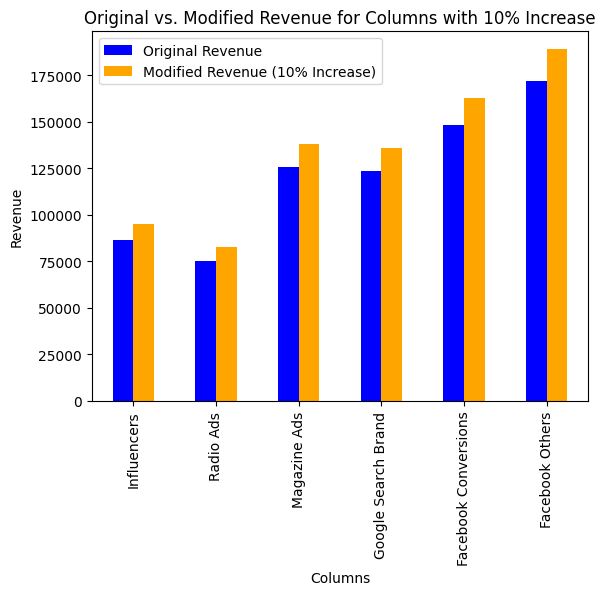

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the specified columns
# Replace 'df' with your actual DataFrame name

# Columns to increase revenue by 10%
columns_to_increase = [
    'Influencers',
    'Radio Ads',
    'Magazine Ads',
    'Google Search Brand',
    'Facebook Conversions',
    'Facebook Others',
]

# Create a copy of the DataFrame to avoid modifying the original data
df_modified = df.copy()

# Increase revenue by 10% for the specified columns
df_modified[columns_to_increase] *= 1.1

# Calculate the total revenue for the original and modified DataFrame
total_revenue_original = df['Revenue'].sum()
total_revenue_modified = df_modified['Revenue'].sum()


# Print the increase in revenue for each column
for column in columns_to_increase:
    original_column_sum = df[column].sum()
    modified_column_sum = df_modified[column].sum()
    increase_percentage = ((modified_column_sum - original_column_sum) / original_column_sum) * 100

    print(f"\nColumn: {column}")
    print(f"Original Sum: {original_column_sum}")
    print(f"Modified Sum (10% Increase): {modified_column_sum}")
    print(f"Increase Percentage: {increase_percentage:.2f}%\n")

import matplotlib.pyplot as plt

# Create a DataFrame to hold the original and modified sums
comparison_df = pd.DataFrame({
    'Column': columns_to_increase,
    'Original Revenue': df[columns_to_increase].sum(),
    'Modified Revenue (10% Increase)': df_modified[columns_to_increase].sum()
})

# Plotting
plt.figure(figsize=(12, 8))

# Bar chart for original and modified revenue
comparison_df.set_index('Column').plot(kind='bar', color=['blue', 'orange'])
plt.title('Original vs. Modified Revenue for Columns with 10% Increase')
plt.xlabel('Columns')
plt.ylabel('Revenue')
plt.show()


# Decrease revenue by 10%

Column: Display Ads
Original Sum: 269523.3969114267
Decreased Sum (10% Decrease): 242571.057220284
Decrease Percentage: 10.00%

Column: Google Performance Max
Original Sum: 248419.78875743656
Decreased Sum (10% Decrease): 223577.8098816929
Decrease Percentage: 10.00%

Column: Google Search No Brand
Original Sum: 334129.30334010586
Decreased Sum (10% Decrease): 300716.3730060952
Decrease Percentage: 10.00%

Column: TV Ads
Original Sum: 453014.89519691747
Decreased Sum (10% Decrease): 407713.40567722573
Decrease Percentage: 10.00%



<Figure size 1200x800 with 0 Axes>

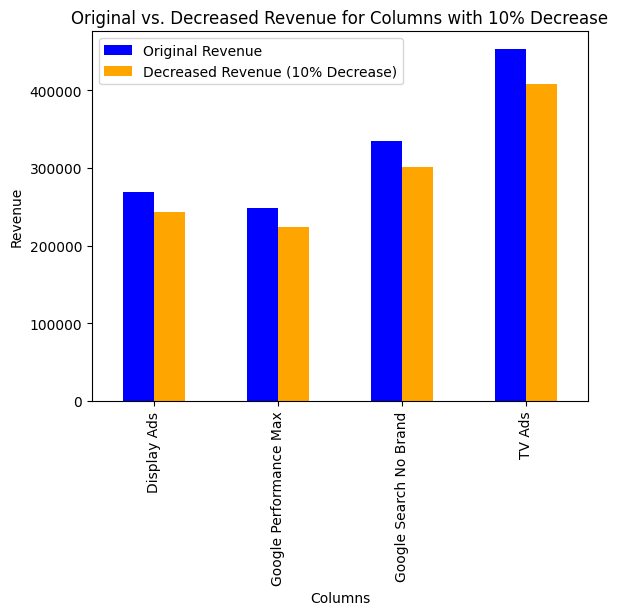

In [18]:
# Specify columns to decrease by 10%
columns_to_decrease = ['Display Ads', 'Google Performance Max', 'Google Search No Brand', 'TV Ads']

# Create a copy of the DataFrame to modify
df_decreased = df.copy()

# Decrease revenue by 10% for specified columns
df_decreased[columns_to_decrease] *= 0.9

# Print the results for verification
for column in columns_to_decrease:
    original_sum = df[column].sum()
    decreased_sum = df_decreased[column].sum()
    decrease_percentage = ((original_sum - decreased_sum) / original_sum) * 100
    print(f"Column: {column}")
    print(f"Original Sum: {original_sum}")
    print(f"Decreased Sum (10% Decrease): {decreased_sum}")
    print(f"Decrease Percentage: {decrease_percentage:.2f}%\n")

# Create a DataFrame to compare results
decrease_comparison_df = pd.DataFrame({
    'Column': columns_to_decrease,
    'Original Revenue': df[columns_to_decrease].sum(),
    'Decreased Revenue (10% Decrease)': df_decreased[columns_to_decrease].sum()
})

# Visualize the results using a bar chart
plt.figure(figsize=(12, 8))
decrease_comparison_df.set_index('Column').plot(kind='bar', color=['blue', 'orange'])
plt.title('Original vs. Decreased Revenue for Columns with 10% Decrease')
plt.xlabel('Columns')
plt.ylabel('Revenue')
plt.show()


# Time Series Analysis

Trend Component:
 count     283.000000
mean     7951.888359
std       353.490643
min      7215.026534
25%      7734.483463
50%      7906.900214
75%      8250.944989
max      8756.731633
Name: trend, dtype: float64

Seasonal Component:
 count     313.000000
mean       -4.417933
std       357.443929
min     -1065.366424
25%      -160.913589
50%         2.998736
75%       192.925315
max       667.642727
Name: seasonal, dtype: float64

Residual Component:
 count     283.000000
mean       -8.812377
std       975.291231
min     -2353.207067
25%      -698.280411
50%       -72.489850
75%       670.057707
max      3032.615798
Name: resid, dtype: float64


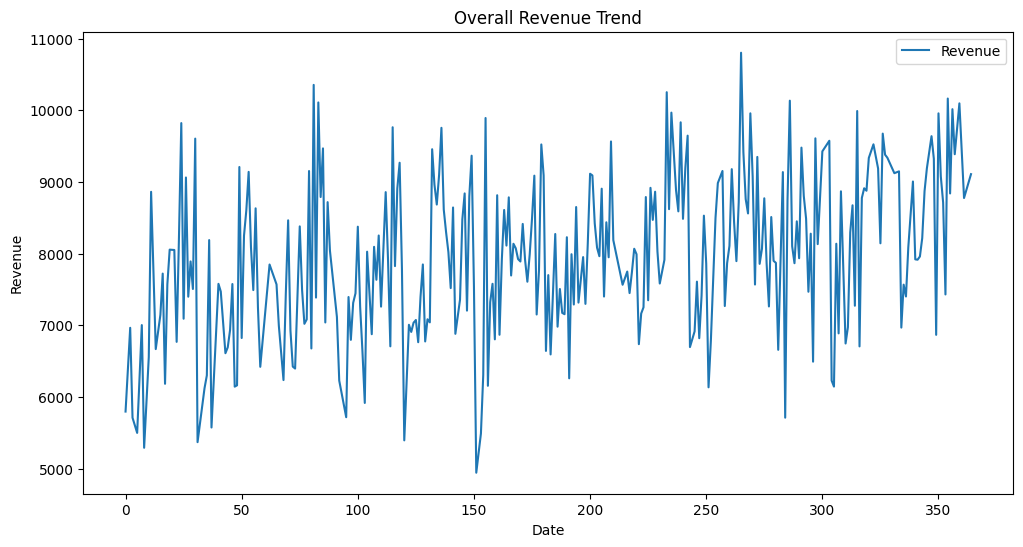

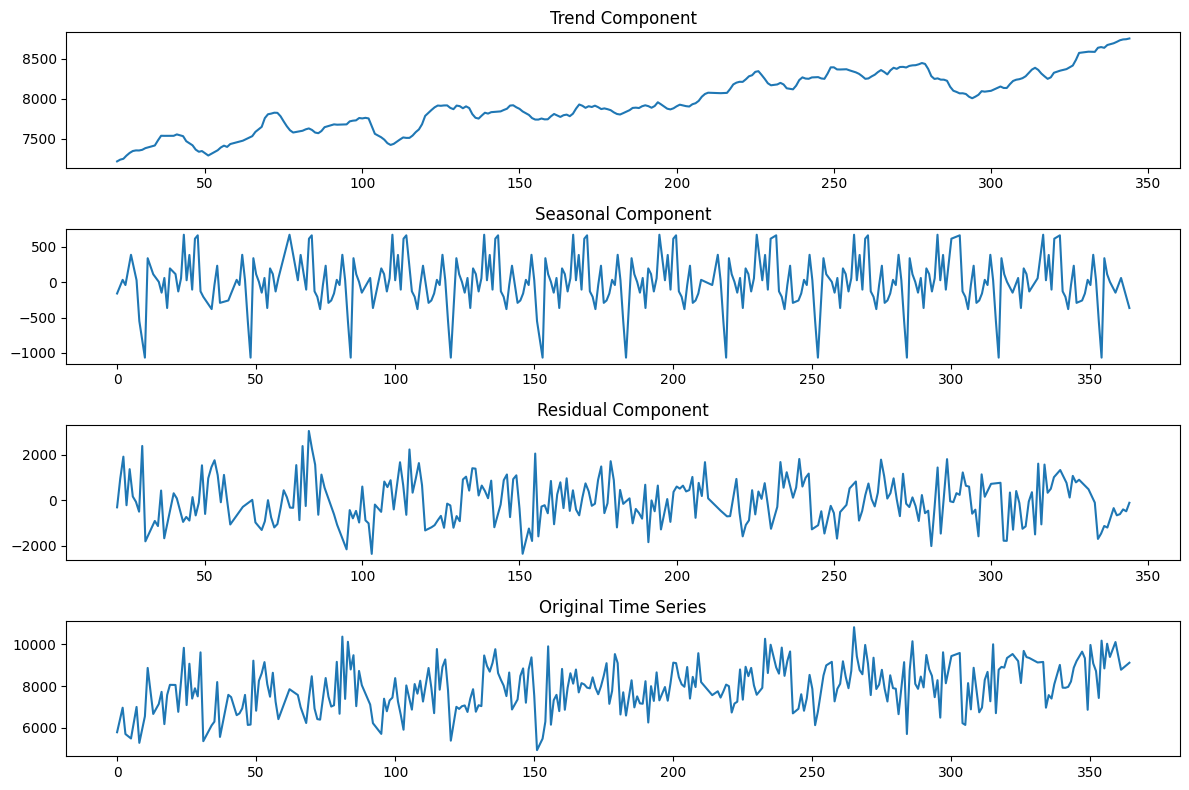

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot the overall revenue trend
plt.figure(figsize=(12, 6))
plt.plot(df['Revenue'], label='Revenue')
plt.title('Overall Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Decompose the time series with a smaller period (e.g., 30 days)
result = seasonal_decompose(df['Revenue'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(df['Revenue'], label='Original')
plt.title('Original Time Series')

plt.tight_layout()
plt.show()


In [30]:
import itertools
import statsmodels.api as sm

# Grid search
p_values = range(0, 3)
d_values = range(1, 2)
q_values = range(0, 3)

best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        model = sm.tsa.ARIMA(df['Revenue'], order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print(f"Best AIC: {best_aic}, Best Order: {best_order}")


Best AIC: 5232.402133410047, Best Order: (2, 1, 1)


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  313
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2612.201
Date:                Fri, 01 Dec 2023   AIC                           5232.402
Time:                        16:21:19   BIC                           5247.374
Sample:                             0   HQIC                          5238.386
                                - 313                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1633      0.062      2.635      0.008       0.042       0.285
ar.L2          0.1457      0.060      2.422      0.015       0.028       0.264
ma.L1         -0.9653      0.023    -42.686      0.0

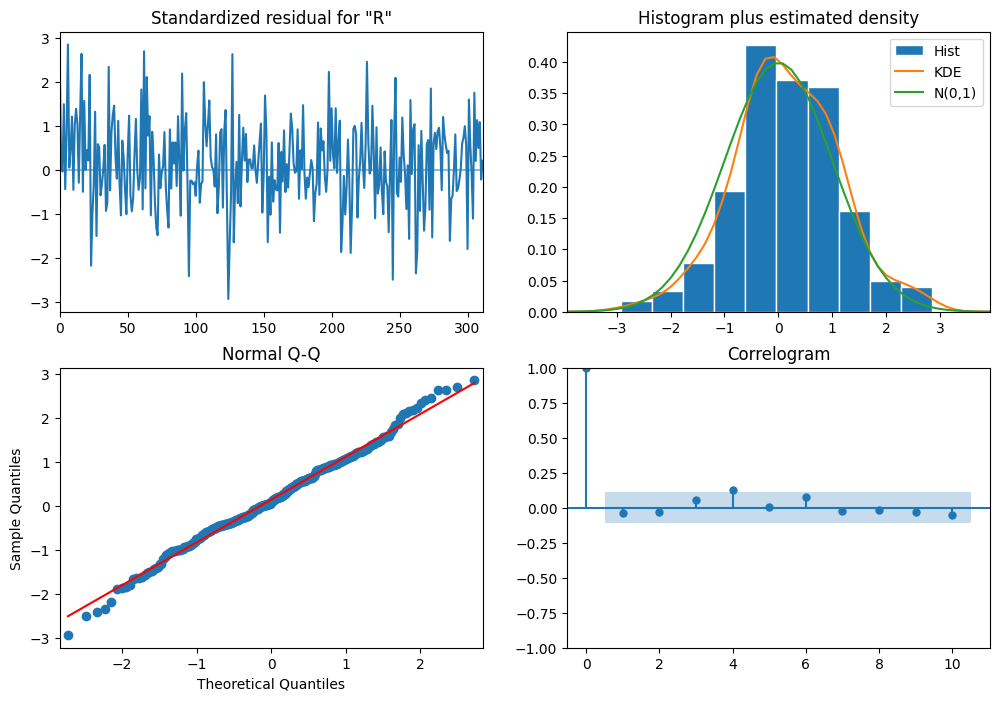

In [32]:
import statsmodels.api as sm

# Fit the ARIMA model with the best order
best_order = (2, 1, 1)
model = sm.tsa.ARIMA(df['Revenue'], order=best_order)
results = model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()


# Min-Max scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your feature matrices
scaler = MinMaxScaler()

# Apply Min-Max scaling to the specified columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit on training data and transform both training and testing data
X_train_scaled[cost_columns] = scaler.fit_transform(X_train[cost_columns])
X_test_scaled[cost_columns] = scaler.transform(X_test[cost_columns])

# ols_model

In [21]:
import statsmodels.api as sm

# Add a constant term to the feature matrices
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Create and fit the OLS model
ols_model = sm.OLS(y_train, X_train_scaled)
ols_results = ols_model.fit()

# Print the summary of the OLS regression
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     99.53
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.78e-82
Time:                        16:04:04   Log-Likelihood:                -1887.2
No. Observations:                 250   AIC:                             3798.
Df Residuals:                     238   BIC:                             3841.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Ridge and Lasso regression model

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
revenue_column = 'Revenue'
cost_columns = [
    'Google Performance Max',
    'Google Search Brand',
    'Facebook Product Catalog Sales',
    'Radio Ads',
]

# Select the relevant columns
selected_columns = cost_columns + [revenue_column]
selected_df = df[selected_columns]

# Split the data into training and testing sets
train_df, test_df = train_test_split(selected_df, test_size=0.2, random_state=42)

# Separate features (X) and target variable (y)
X_train = train_df[cost_columns]
y_train = train_df[revenue_column]

X_test = test_df[cost_columns]
y_test = test_df[revenue_column]

# Scale the features using Min-Max scaling (Normalization)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Ridge and Lasso regression models
ridge_model = Ridge(alpha=1)  
lasso_model = Lasso(alpha=1)  

# Fit the models on the scaled training data
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression:")
print(f'Mean Squared Error: {mse_ridge}')
print(f'R-squared: {r2_ridge}')

print("\nLasso Regression:")
print(f'Mean Squared Error: {mse_lasso}')
print(f'R-squared: {r2_lasso}')


Ridge Regression:
Mean Squared Error: 188066.20405754
R-squared: 0.8657085475888283

Lasso Regression:
Mean Squared Error: 181546.66758606018
R-squared: 0.8703639189575978


# Ridge and Lasso Regression Hyperparameter Tuning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame with the specified columns
revenue_column = 'Revenue'
cost_columns = [
    'Google Performance Max',
    'Google Search Brand',
    'Facebook Product Catalog Sales',
    'Radio Ads',
]

# Select the relevant columns
selected_columns = cost_columns + [revenue_column]
selected_df = df[selected_columns]

# Split the data into training and testing sets
train_df, test_df = train_test_split(selected_df, test_size=0.2, random_state=42)

# Separate features (X) and target variable (y)
X_train = train_df[cost_columns]
y_train = train_df[revenue_column]

X_test = test_df[cost_columns]
y_test = test_df[revenue_column]

# Scale the features using Min-Max scaling (Normalization)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression Hyperparameter Tuning
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Lasso Regression Hyperparameter Tuning
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Train Ridge and Lasso models with the best hyperparameters
ridge_model = Ridge(alpha=best_alpha_ridge)
lasso_model = Lasso(alpha=best_alpha_lasso)

ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression:")
print(f'Best Alpha: {best_alpha_ridge}')
print(f'Mean Squared Error: {mse_ridge}')
print(f'R-squared: {r2_ridge}')

print("\nLasso Regression:")
print(f'Best Alpha: {best_alpha_lasso}')
print(f'Mean Squared Error: {mse_lasso}')
print(f'R-squared: {r2_lasso}')


Ridge Regression:
Best Alpha: 0.1
Mean Squared Error: 180846.45498678237
R-squared: 0.8708639161124553

Lasso Regression:
Best Alpha: 0.01
Mean Squared Error: 180163.10696975884
R-squared: 0.8713518708631148


# cross-validation scores

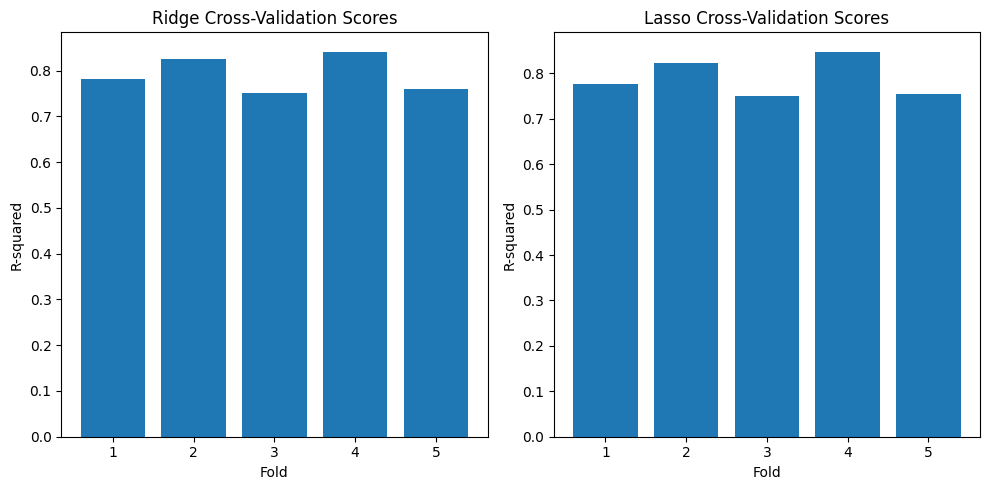

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
revenue_column = 'Revenue'
cost_columns = [
    'Google Performance Max',
    'Google Search Brand',
    'Facebook Product Catalog Sales',
    'Radio Ads',
]

# Select the relevant columns
selected_columns = cost_columns + [revenue_column]
selected_df = df[selected_columns]

# Split the data into training and testing sets
train_df, test_df = train_test_split(selected_df, test_size=0.2, random_state=42)

# Separate features (X) and target variable (y)
X_train = train_df[cost_columns]
y_train = train_df[revenue_column]

X_test = test_df[cost_columns]
y_test = test_df[revenue_column]

# Scale the features using Min-Max scaling (Normalization)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Ridge and Lasso regression models
ridge_model = Ridge(alpha=1)  
lasso_model = Lasso(alpha=1)  

# Perform k-fold cross-validation
ridge_cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')
lasso_cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Plot cross-validation scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), ridge_cv_scores)
plt.title('Ridge Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('R-squared')

plt.subplot(1, 2, 2)
plt.bar(range(1, 6), lasso_cv_scores)
plt.title('Lasso Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


# Business Problem and Solution 

### XYZ Company is currently grappling with challenges in effectively allocating its advertising revenue and is actively seeking a viable solution to address this issue.

### Budget Constraints:

Problem: Limited marketing budgets may prevent businesses from fully exploring the potential of certain channels or                      experimenting with new strategies.

solution: Increase revenue by 10% on 'Influencers','Radio Ads','Magazine Ads','Google Search Brand','Facebook Conversions',               'Facebook Others' can increase the revenue based on ROI.
          Reducing spending on 'Display Ads,' 'Google Performance Max,' 'Google Search No Brand,' and 'TV Ads' by 10% is a                 strategic measure aimed at minimizing potential revenue waste.


### Time Series Analysis:
Problem: Forecasting future values of 'Revenue' using a SARIMAX model needs improvement.

Gains: A more comprehensive, reliable, and adaptable SARIMAX model for accurate 'Revenue' forecasting.

### Model Performance

OLS performed well (Adj. R-squared: 0.8657, MSE: 188066.20). L1 and L2 regularization, with tuned hyperparameters (Lasso: Alpha 0.01, MSE 180163.11, Adj. R-squared 0.8714; Ridge: Alpha 0.1, MSE 180846.45, Adj. R-squared 0.8709), improved accuracy, highlighting the significance of hyperparameter tuning in refining model precision.